## Solar Power Prediction using Linear Regression Model 

In [138]:
# import neccesary libraries
import pandas as pd
import numpy as np 
import seaborn as sns 

In [139]:
# Load the dataset
df = pd.read_csv('DATASET/solarpowerprediction.csv')
# display the first 5 rows of the dataset
df.head()


,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [140]:
df.tail()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
4208,8.69,66,1025.1,0.0,0.0,100.0,100,100,100,257.21,...,285.42,25.50,283.06,24.01,282.99,25.20,22.700907,64.952098,167.06794,173.410560
4209,7.57,90,1026.1,0.0,0.0,100.0,79,100,100,210.04,...,6.91,13.00,4.76,11.61,7.13,10.44,19.307487,63.895118,182.28247,403.792220
4210,7.27,90,1026.3,0.1,0.0,100.0,73,100,100,113.92,...,2.29,8.71,352.87,7.95,354.81,22.32,25.249506,65.827032,197.33868,158.367780
4211,8.25,81,1025.5,0.0,0.0,100.0,74,66,100,186.90,...,11.31,6.29,13.24,5.94,14.04,15.48,36.361161,70.496313,211.30027,126.953060
4212,8.00,80,1025.3,0.0,0.0,100.0,100,100,100,172.66,...,12.72,12.07,17.35,11.38,18.43,16.20,48.452849,76.919574,223.04931,20.055031


In [141]:
df.head(10)

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.100950
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.999400
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.849300
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.609200
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.203400
5,8.69,29,1034.6,0.0,0.0,0.0,0,0,0,449.45,...,23.63,7.10,30.47,6.92,27.90,17.28,25.088167,65.700860,197.22062,2546.081600
6,9.72,27,1034.0,0.0,0.0,0.0,0,0,0,469.92,...,25.02,6.61,29.36,6.44,26.57,12.96,36.197514,70.351498,211.21422,2270.320700
7,10.07,28,1034.1,0.0,0.0,0.0,0,0,0,436.99,...,14.74,7.63,19.29,7.52,16.70,10.80,49.073008,77.228779,223.65641,1063.830200
8,9.38,32,1033.9,0.0,0.0,0.0,0,0,0,353.33,...,6.58,10.50,5.91,10.14,6.12,11.52,62.371140,85.585411,234.50308,86.817611
9,6.54,47,1035.1,0.0,0.0,0.0,0,0,0,228.73,...,360.00,12.25,1.68,11.53,1.79,12.24,105.866560,121.463180,216.06756,9.666667


In [142]:
# to check the total number of rows and columns in the dataset
df.shape

(4213, 21)

In [143]:
# Display summary statistics of the dataset
df.describe()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
count,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,...,4213.000000,4213.000000,4213.000000,4213.00000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000
mean,15.068111,51.361025,1019.337812,0.031759,0.002808,34.056990,14.458818,20.023499,21.373368,387.759036,...,195.078452,18.978483,191.166862,16.36319,192.447911,20.583489,50.837490,59.980947,169.167651,1134.347313
std,8.853677,23.525864,7.022867,0.170212,0.038015,42.843638,30.711707,36.387948,38.013885,278.459293,...,106.626782,11.999960,108.760021,9.88533,106.516195,12.648899,26.638965,19.857711,64.568385,937.957247
min,-5.350000,7.000000,997.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.540000,0.000000,1.120000,0.00000,1.120000,0.720000,3.755323,17.727761,54.379093,0.000595
25%,8.390000,32.000000,1014.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142.400000,...,153.190000,10.140000,130.240000,9.18000,148.220000,11.160000,29.408181,45.291631,114.136600,231.700450
50%,14.750000,48.000000,1018.100000,0.000000,0.000000,8.700000,0.000000,0.000000,0.000000,381.810000,...,191.770000,16.240000,187.770000,14.49000,187.990000,18.000000,47.335557,62.142611,163.241650,971.642650
75%,21.290000,70.000000,1023.600000,0.000000,0.000000,100.000000,9.000000,10.000000,10.000000,599.860000,...,292.070000,26.140000,292.040000,21.97000,288.000000,27.000000,69.197492,74.346737,225.085620,2020.966700
max,34.900000,100.000000,1046.800000,3.200000,1.680000,100.000000,100.000000,100.000000,100.000000,952.300000,...,360.000000,66.880000,360.000000,61.11000,360.000000,84.960000,121.635920,128.415370,289.045180,3056.794100


In [144]:
# display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [145]:
# check for missing values 
df.isnull()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4209,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4210,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4211,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [146]:
# check for missing values in the dataset
df.isnull().sum()

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64

In [147]:
# check for duplicate values in the dataset
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='generated_power_kw', ylabel='Count'>

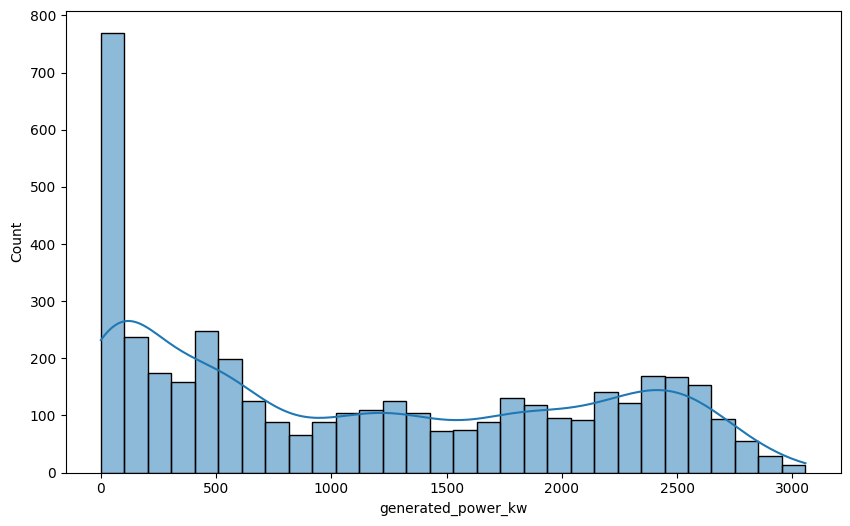

In [148]:
import matplotlib.pyplot as plt
# plot distribution of the power generated
plt.figure(figsize=(10,6))
sns.histplot(df['generated_power_kw'], bins=30, kde=True)

<Axes: xlabel='generated_power_kw', ylabel='Count'>

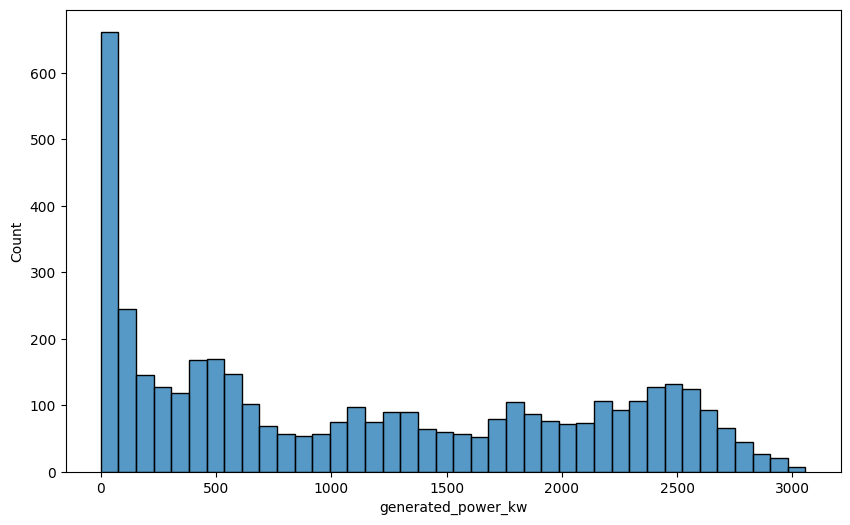

In [149]:
# plot distribution of the power generated
plt.figure(figsize=(10,6))
sns.histplot(df['generated_power_kw'], bins=40, kde=False)

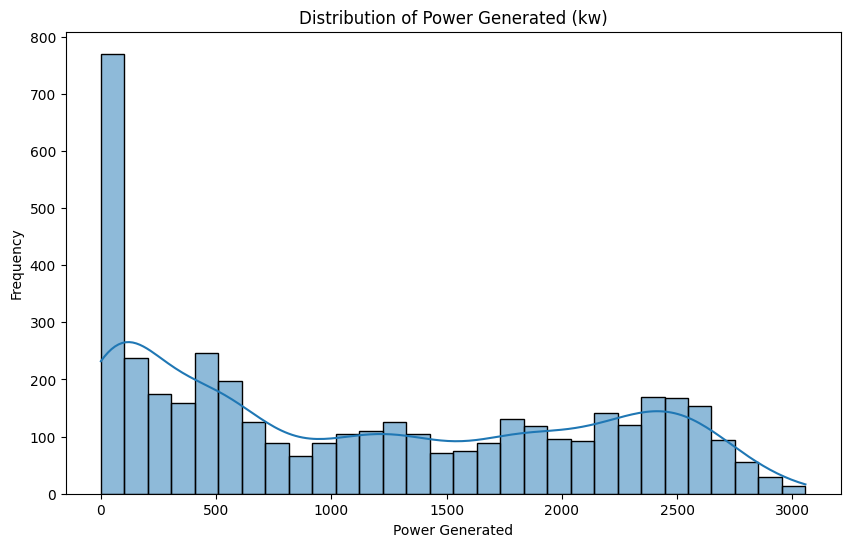

In [150]:
# plot distribution of the power generated
plt.figure(figsize=(10,6))
sns.histplot(df['generated_power_kw'], bins=30, kde=True)
plt.title('Distribution of Power Generated (kw)')
plt.xlabel('Power Generated')
plt.ylabel('Frequency')
plt.show()


## EDA

array([[<Axes: title={'center': 'temperature_2_m_above_gnd'}>,
        <Axes: title={'center': 'relative_humidity_2_m_above_gnd'}>,
        <Axes: title={'center': 'mean_sea_level_pressure_MSL'}>,
        <Axes: title={'center': 'total_precipitation_sfc'}>,
        <Axes: title={'center': 'snowfall_amount_sfc'}>],
       [<Axes: title={'center': 'total_cloud_cover_sfc'}>,
        <Axes: title={'center': 'high_cloud_cover_high_cld_lay'}>,
        <Axes: title={'center': 'medium_cloud_cover_mid_cld_lay'}>,
        <Axes: title={'center': 'low_cloud_cover_low_cld_lay'}>,
        <Axes: title={'center': 'shortwave_radiation_backwards_sfc'}>],
       [<Axes: title={'center': 'wind_speed_10_m_above_gnd'}>,
        <Axes: title={'center': 'wind_direction_10_m_above_gnd'}>,
        <Axes: title={'center': 'wind_speed_80_m_above_gnd'}>,
        <Axes: title={'center': 'wind_direction_80_m_above_gnd'}>,
        <Axes: title={'center': 'wind_speed_900_mb'}>],
       [<Axes: title={'center': 'wind

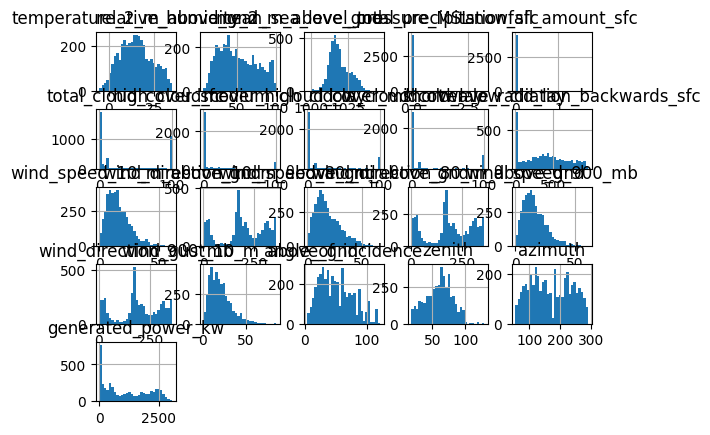

In [151]:
# histogram for the remaining columns
df.hist(bins=30)


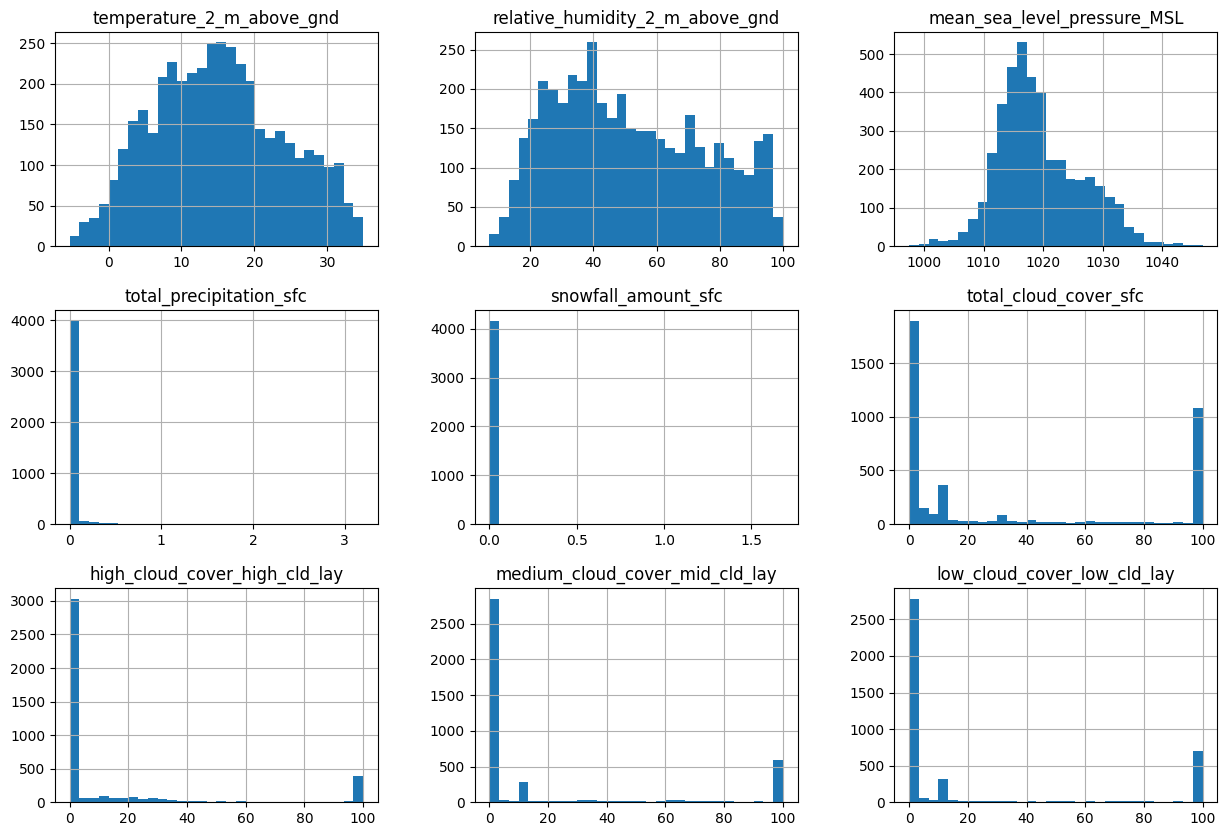

In [152]:
df[df.columns[:9]].hist(bins=30, figsize=(15,10))
plt.show()

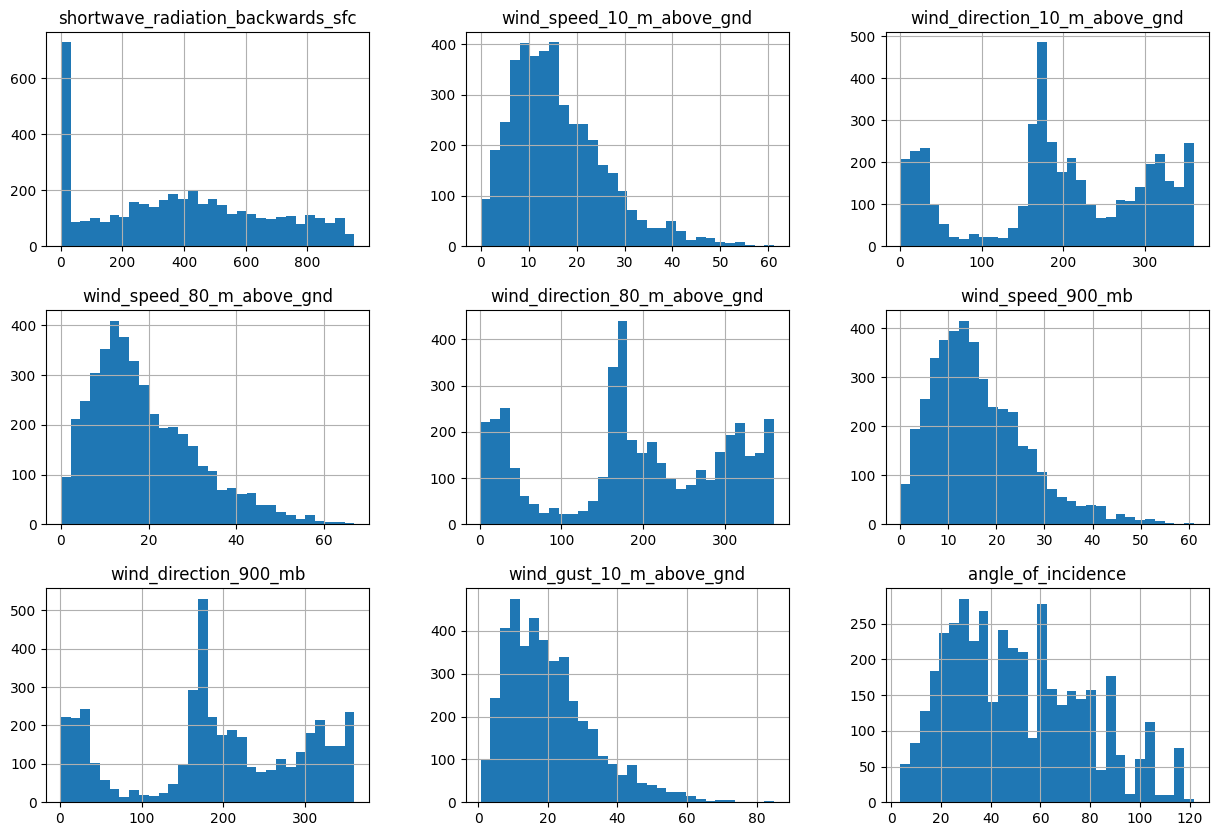

In [153]:
df[df.columns[9:18]].hist(bins=30, figsize=(15,10))
plt.show()  

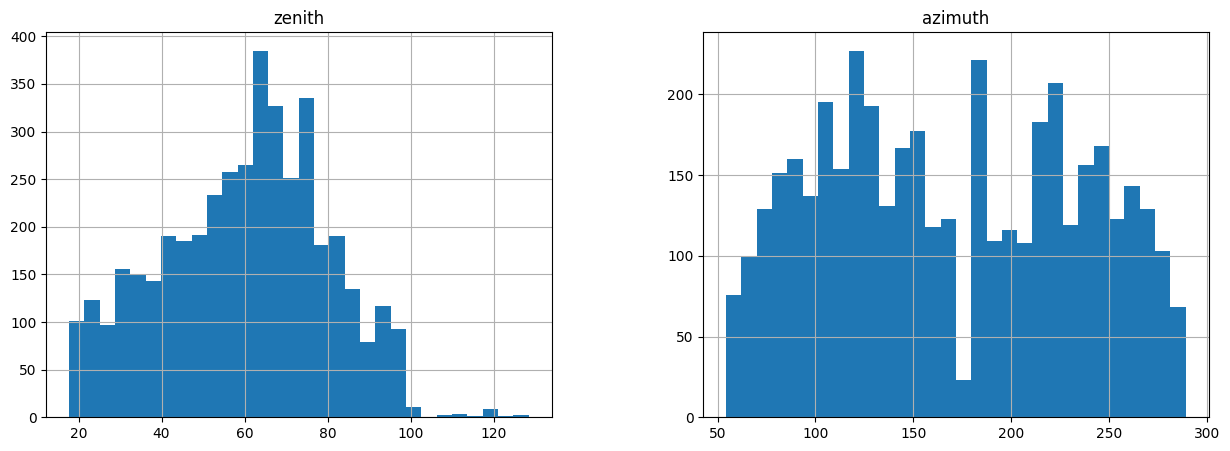

In [154]:
df[df.columns[18:20]].hist(bins=30, figsize=(15,5))
plt.show()

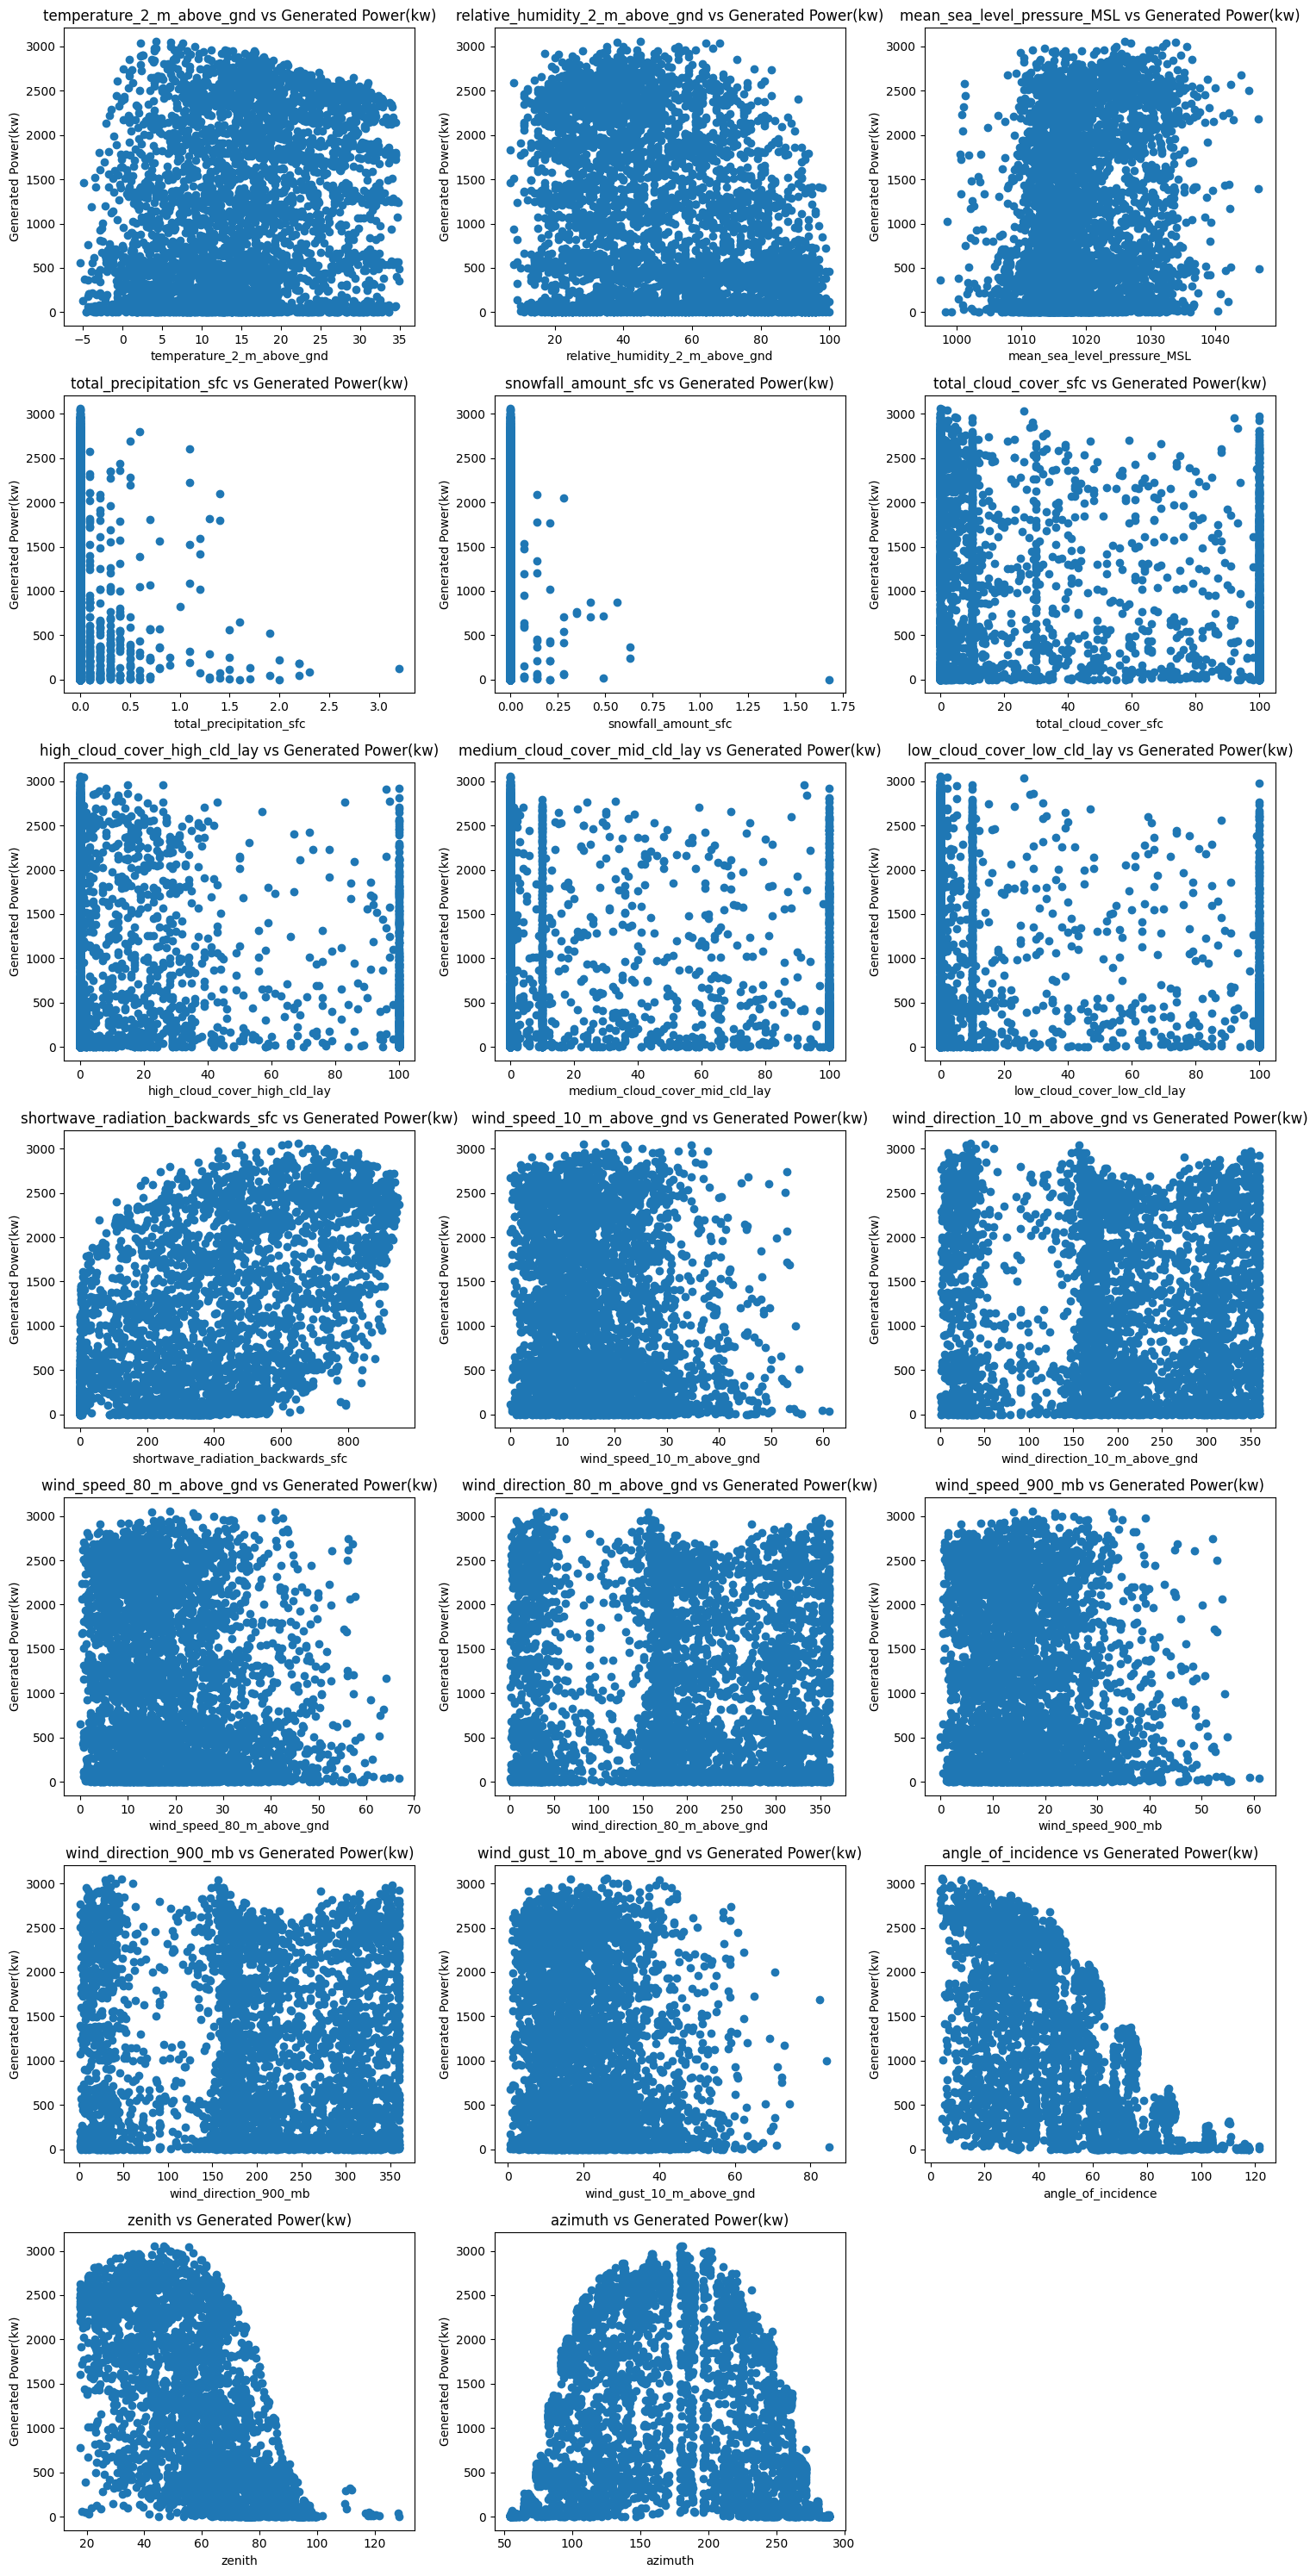

In [155]:
# Bivariate Analysis
# Scatter plot with the target feature, excluding 'generated_power_kw' vs itself
plt.figure(figsize=(15,30))
for i, column in enumerate(df.columns):
    if column != 'generated_power_kw': 
        # Exclude the column itself
        plt.subplot(7, 3, i+1)
        plt.scatter(df[column], df['generated_power_kw'])
        plt.title(f'{column} vs Generated Power(kw)')
        plt.xlabel(column)
        plt.ylabel('Generated Power(kw)')
plt.tight_layout()
plt.show()
 

In [156]:
df.corr()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
temperature_2_m_above_gnd,1.000000,-0.771704,-0.402240,-0.083137,-0.121422,-0.326641,-0.019522,-0.100980,-0.381876,0.665755,...,0.051393,-0.244869,0.086630,-0.198107,0.043233,-0.188264,-0.090173,-0.545646,0.381797,0.217280
relative_humidity_2_m_above_gnd,-0.771704,1.000000,0.100529,0.168660,0.113987,0.402895,0.056452,0.135347,0.490402,-0.721754,...,0.008902,0.212868,-0.019408,0.135464,0.021068,0.144807,0.268460,0.513748,-0.525760,-0.336783
mean_sea_level_pressure_MSL,-0.402240,0.100529,1.000000,-0.159098,-0.053871,-0.151995,-0.014646,-0.129812,-0.162043,-0.188387,...,-0.119867,-0.131442,-0.161020,-0.145696,-0.125234,-0.189266,-0.075619,0.268111,-0.137872,0.150551
total_precipitation_sfc,-0.083137,0.168660,-0.159098,1.000000,0.184497,0.223678,0.076255,0.262367,0.282748,-0.130358,...,0.005234,0.052376,0.007131,0.044797,0.003216,0.066701,-0.020965,-0.023408,0.005749,-0.118442
snowfall_amount_sfc,-0.121422,0.113987,-0.053871,0.184497,1.000000,0.112646,-0.026356,0.042867,0.151609,-0.073499,...,0.039734,0.093156,0.041246,0.100405,0.041716,0.093060,-0.012497,0.033554,0.008426,-0.049508
total_cloud_cover_sfc,-0.326641,0.402895,-0.151995,0.223678,0.112646,1.000000,0.442865,0.712077,0.746225,-0.345089,...,0.055057,0.183732,0.039671,0.174510,0.057816,0.212142,-0.003426,0.136249,-0.037427,-0.334338
high_cloud_cover_high_cld_lay,-0.019522,0.056452,-0.014646,0.076255,-0.026356,0.442865,1.000000,0.593300,0.024703,-0.089620,...,0.017688,0.090049,0.018228,0.078204,0.020897,0.092842,-0.033840,0.031766,0.020790,-0.147723
medium_cloud_cover_mid_cld_lay,-0.100980,0.135347,-0.129812,0.262367,0.042867,0.712077,0.593300,1.000000,0.236716,-0.199843,...,0.016954,0.088972,0.021935,0.076192,0.017195,0.079627,-0.035511,0.046719,0.014802,-0.227834
low_cloud_cover_low_cld_lay,-0.381876,0.490402,-0.162043,0.282748,0.151609,0.746225,0.024703,0.236716,1.000000,-0.336751,...,0.040060,0.156204,0.021782,0.153578,0.039875,0.193846,0.013421,0.120854,-0.054328,-0.288066
shortwave_radiation_backwards_sfc,0.665755,-0.721754,-0.188387,-0.130358,-0.073499,-0.345089,-0.089620,-0.199843,-0.336751,1.000000,...,-0.076530,-0.077090,-0.051670,0.028929,-0.081545,0.017212,-0.576921,-0.801892,0.549296,0.556148


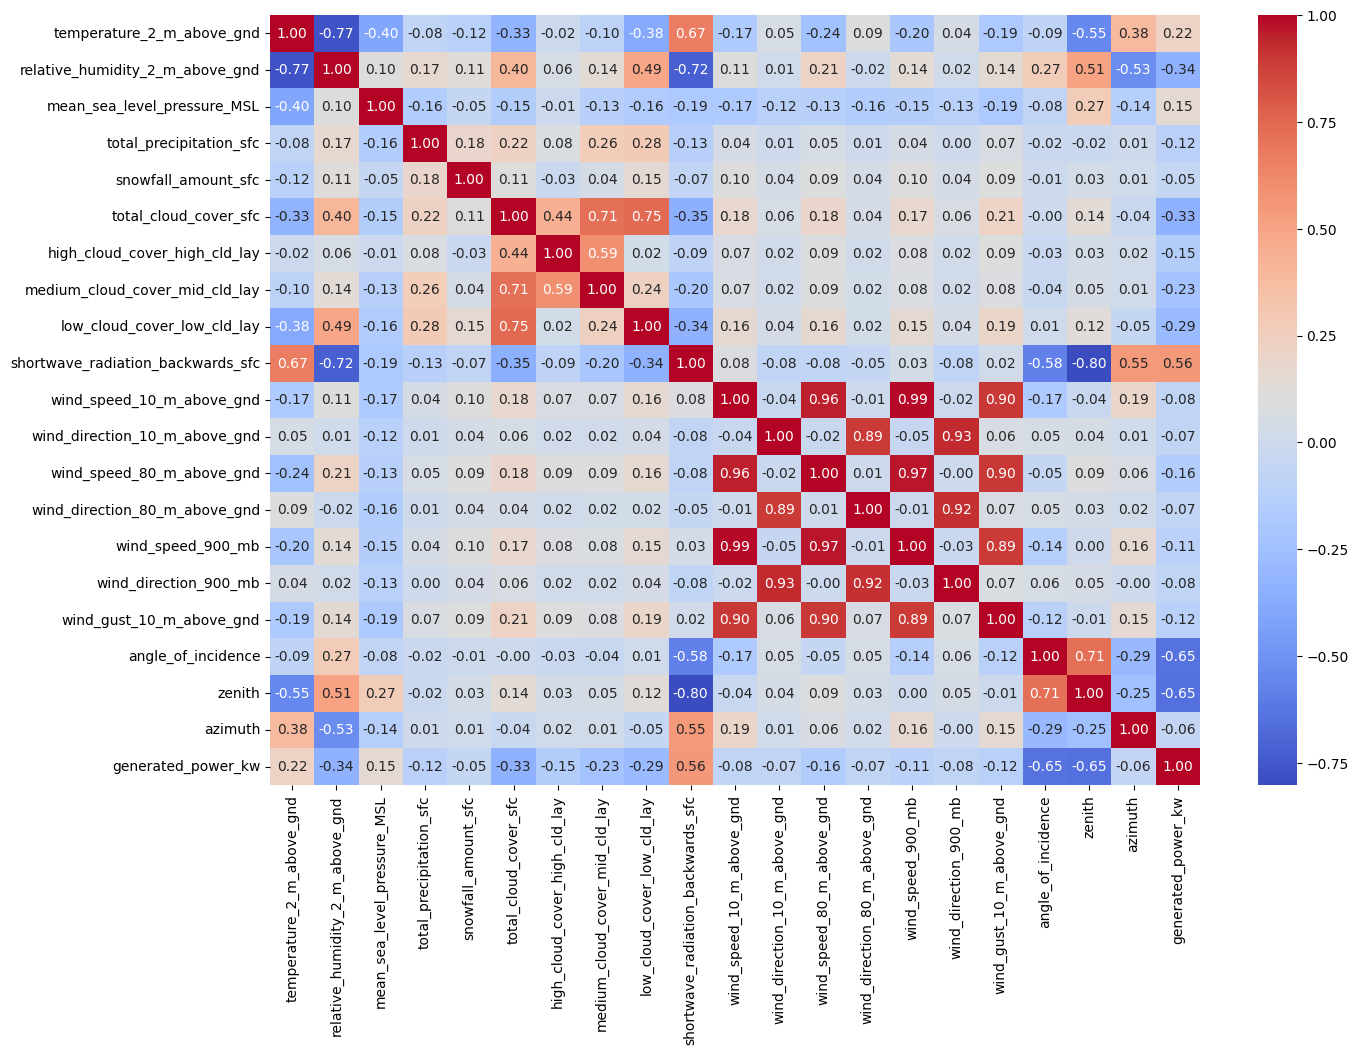

In [157]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

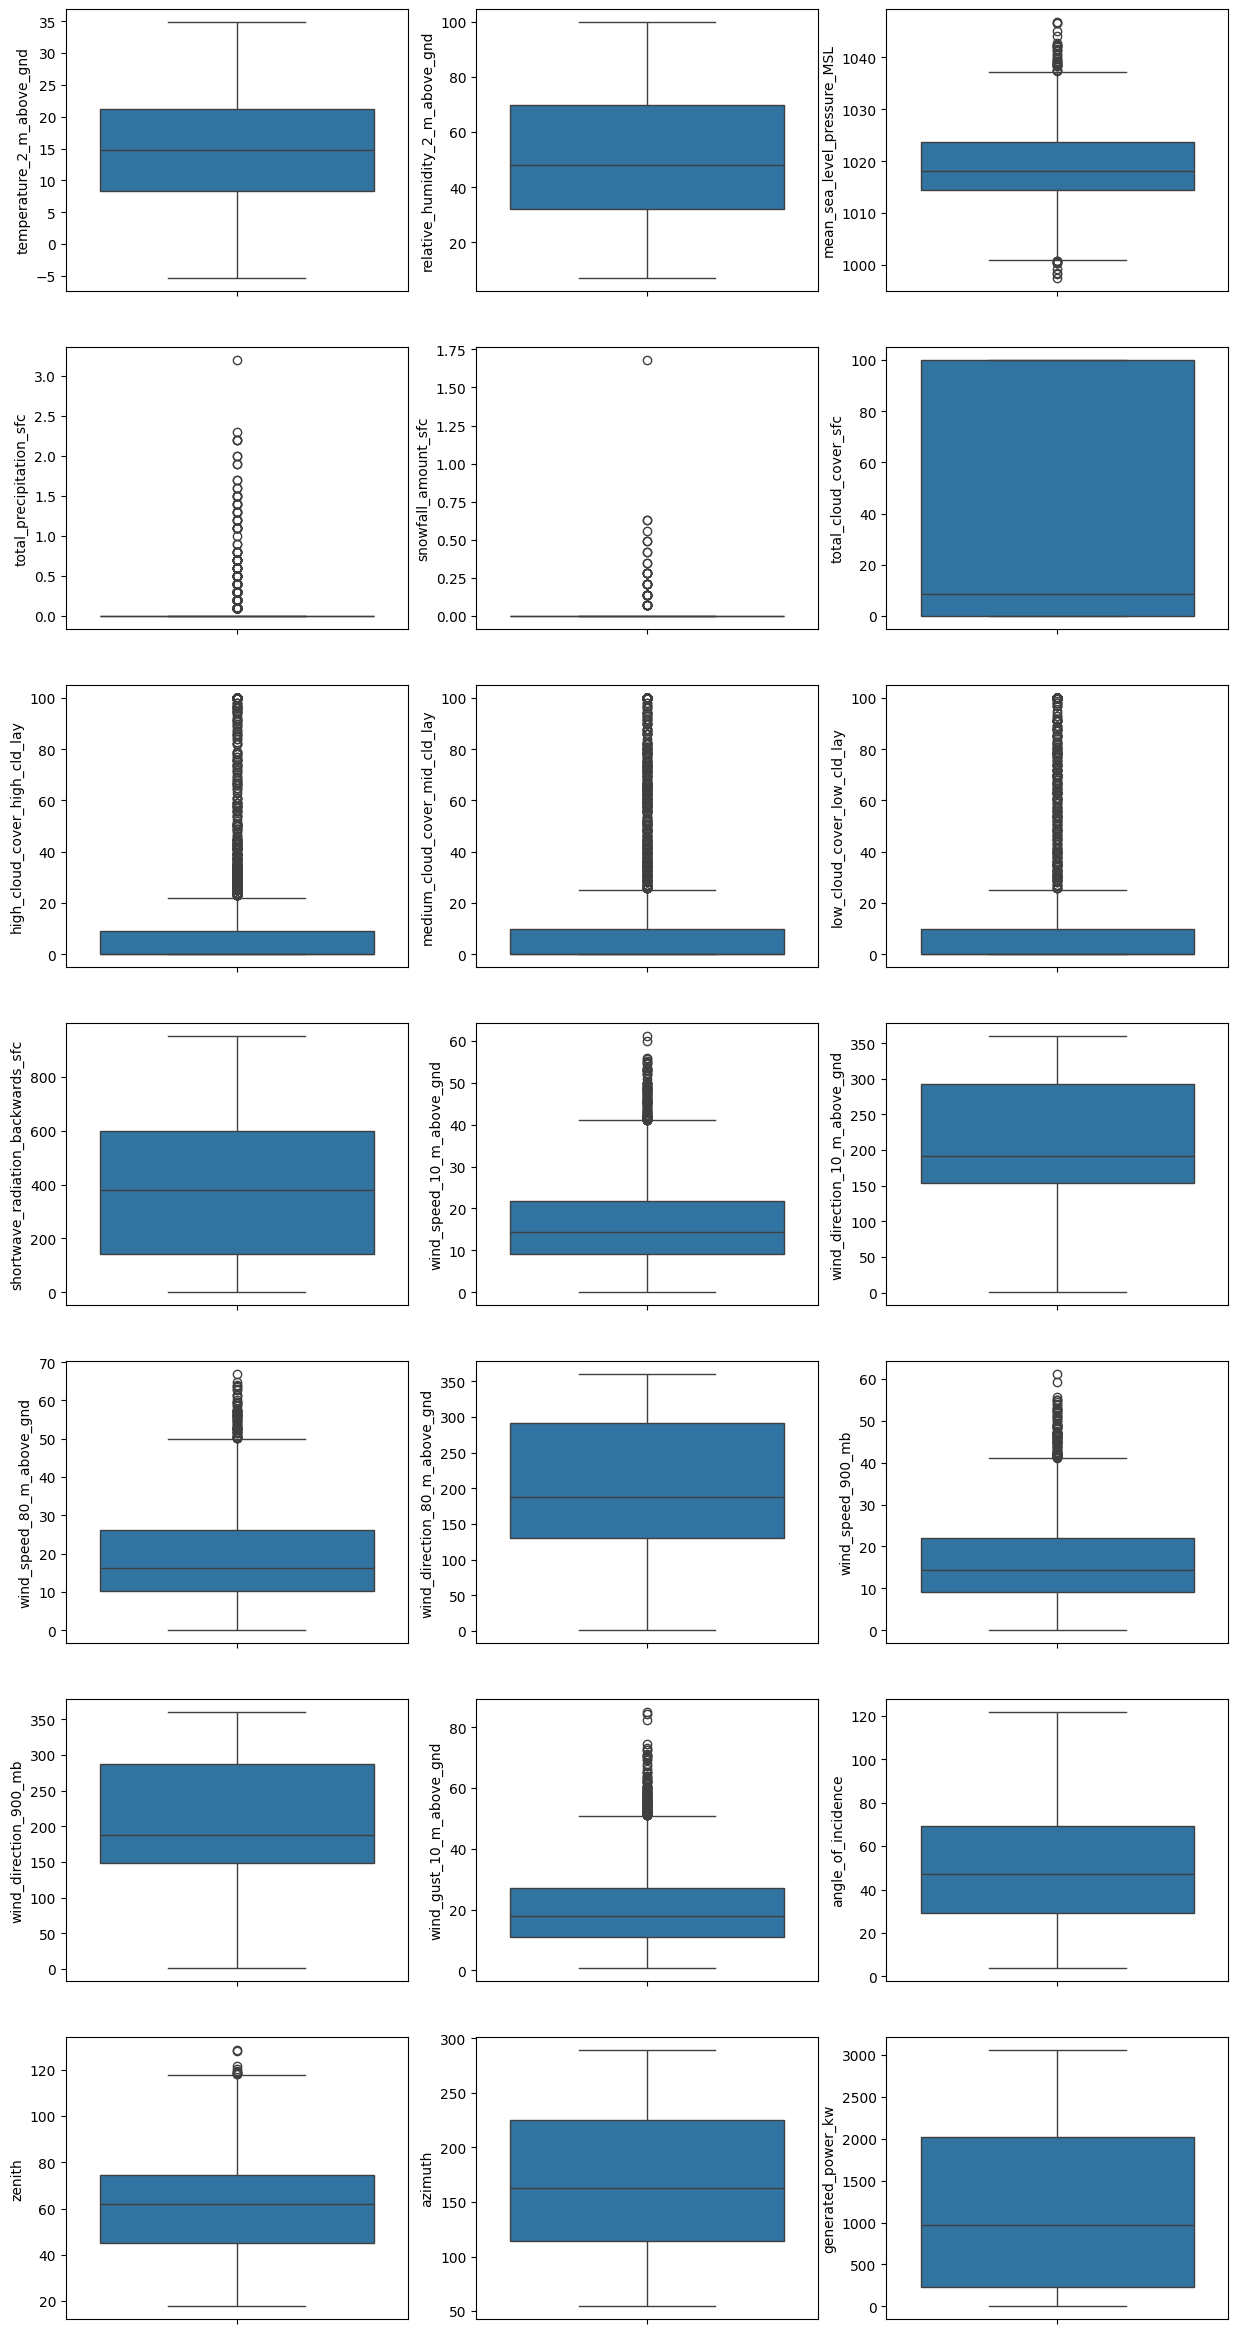

In [158]:
# Outlier 
plt.figure(figsize=(15,30))
for i, column in enumerate(df.columns):
    plt.subplot(7, 3, i+1)
    sns.boxplot(df[column])
plt.show()

In [159]:
df.columns


Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_direction_80_m_above_gnd',
       'wind_speed_900_mb', 'wind_direction_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth',
       'generated_power_kw'],
      dtype='object')

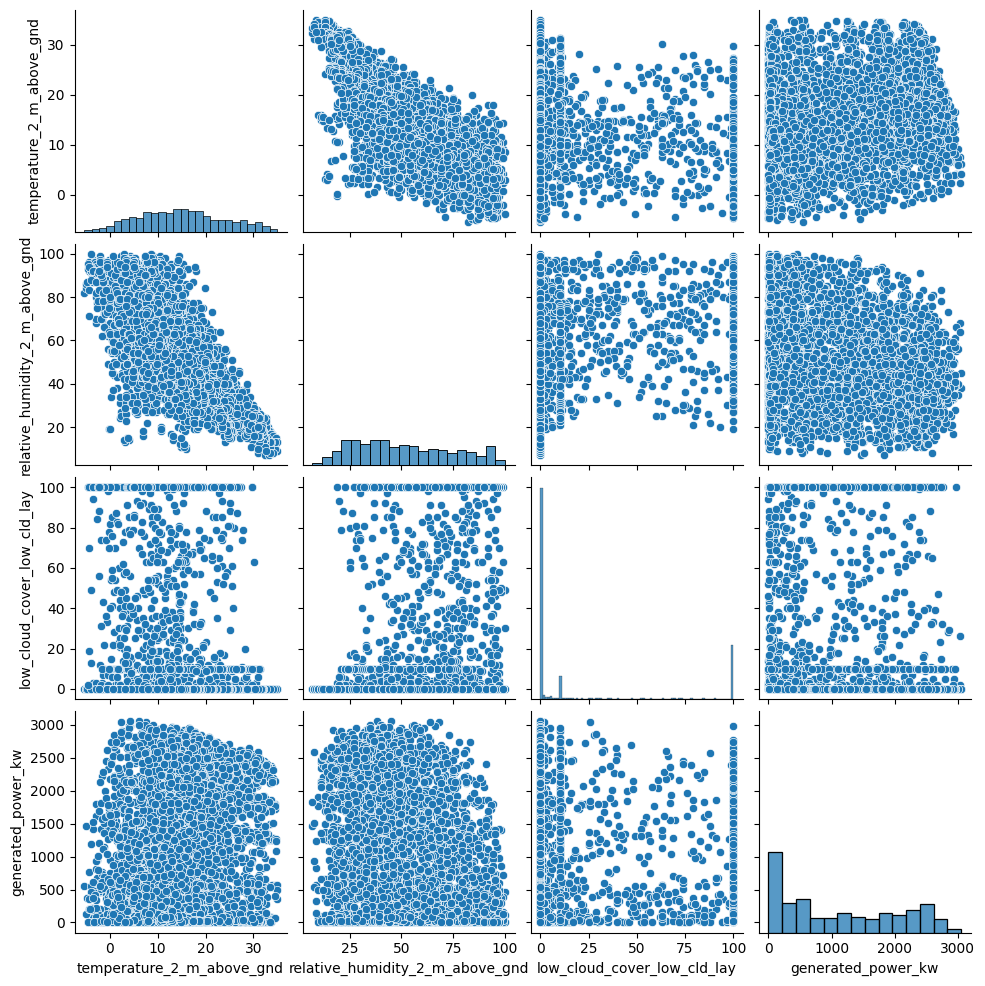

In [160]:
# Pairplot for weather-related features and generated power
sns.pairplot(df[['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd', 'low_cloud_cover_low_cld_lay', 'generated_power_kw']])
plt.show()


## Machine Learning for SOLAR POWER OUTPUT( LINEAR REGRESSION)

In [161]:

%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [162]:
# Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [163]:

df.columns

Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_direction_80_m_above_gnd',
       'wind_speed_900_mb', 'wind_direction_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth',
       'generated_power_kw'],
      dtype='object')

In [164]:
# Split the dataset into features and target variable
X = df.drop('generated_power_kw', axis=1)
y = df['generated_power_kw']

In [165]:
# Split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [166]:
# scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [167]:
# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

## FEATURE ENGINEERING (LINEAR REGRESSION)

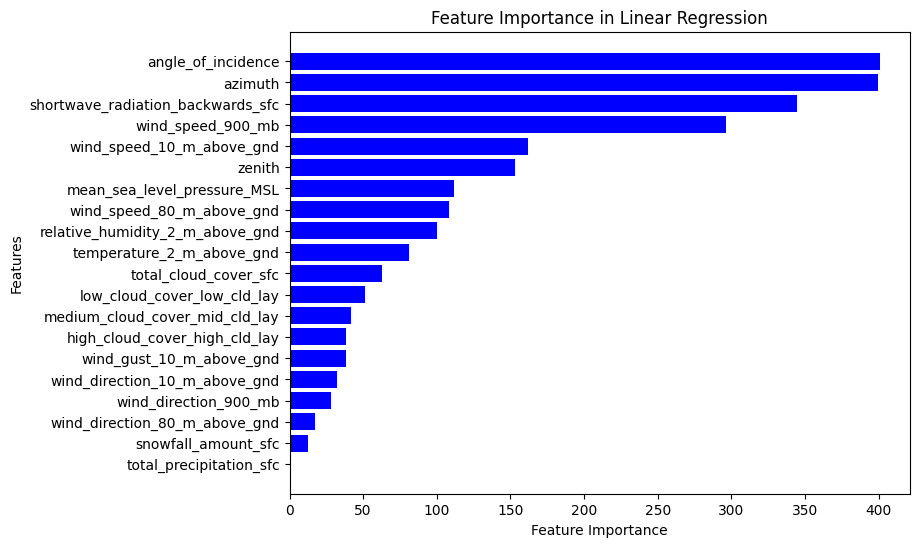

In [168]:

feature_importance_lr = abs(model.coef_)
feature_names = X.columns 
importance_df_lr = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_lr})
importance_df_lr = importance_df_lr.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(8,6))
plt.barh(importance_df_lr['Feature'], importance_df_lr['Importance'], color="blue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Linear Regression")
plt.gca().invert_yaxis()  
plt.show()


##  EVALUATE THE MODEL USING MEAN SQUARED ERROR(LR)

In [169]:
# evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on TEST SET: {mse}')

Mean Squared Error on TEST SET: 257589.05769408224


In [170]:
# evaluate the model on the training set
y_pred_train = model.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error on TRAIN SET: {mse_train}')

Mean Squared Error on TRAIN SET: 258712.55365443736


## EVALUATE THE MODEL USING MEAN ABSOLUTE ERROR(LR)

In [171]:
# evaluate the model
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error on TEST SET: {mae}')

Mean Absolute Error on TEST SET: 391.79269568403123


In [172]:
# evaluate the model on the training set
y_pred_train = model.predict(X_train_scaled)
mae_train = mean_absolute_error(y_train, y_pred_train)
print(f'Mean Absolute Error on TRAIN SET: {mae_train}')

Mean Absolute Error on TRAIN SET: 392.42118159774026


## Machine Learning for SOLAR POWER OUTPUT(RANDOM FOREST REGRESSION)

In [173]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [174]:
# Define features (X) and target variable (y)
X = df.drop(columns=['generated_power_kw'])  # Replace with actual target column name if different
y = df['generated_power_kw']

In [175]:
# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

RandomForestRegressor(random_state=42)

In [176]:
# Predictions on Training & Test Set
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

## FEATURE ENGINEERING


In [177]:
# feature importance
feature_importance = rf_model.feature_importances_
feature_names = X.columns

C:\Users\hp\AppData\Local\Temp\ipykernel_22700\1931663915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_names, palette="viridis")


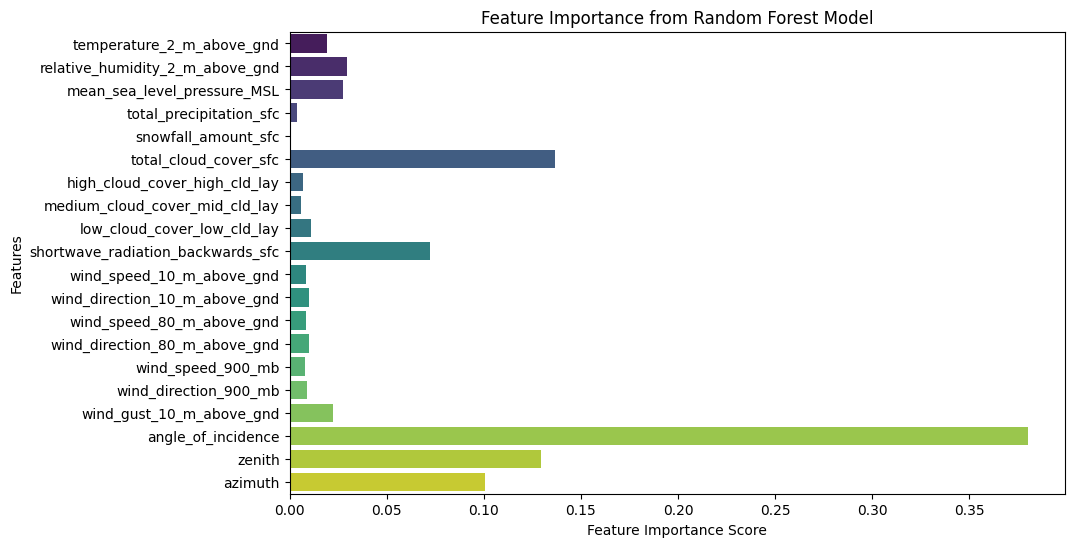

In [178]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest Model")
plt.show()

##  EVALUATE THE MODEL USING DIFFRENT PARAMETERS(RANDOM FOREST REGRESSION)

In [179]:

# Function to compute evaluation metrics
def evaluate_model(y_true, y_pred, model_name, dataset_type):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n {model_name} Evaluation on {dataset_type} Set:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.3f}")

# Evaluate both models on Training & Testing sets
evaluate_model(y_train, y_train_pred_rf, "Random Forest", "Training")
evaluate_model(y_test, y_test_pred_rf, "Random Forest", "Testing")



 Random Forest Evaluation on Training Set:
Mean Absolute Error (MAE): 95.99
Mean Squared Error (MSE): 23774.20
Root Mean Squared Error (RMSE): 154.19
R² Score: 0.973

 Random Forest Evaluation on Testing Set:
Mean Absolute Error (MAE): 93.76
Mean Squared Error (MSE): 23248.05
Root Mean Squared Error (RMSE): 152.47
R² Score: 0.975


## Linear Regression - Actual vs. Predicted Scatter Plot 

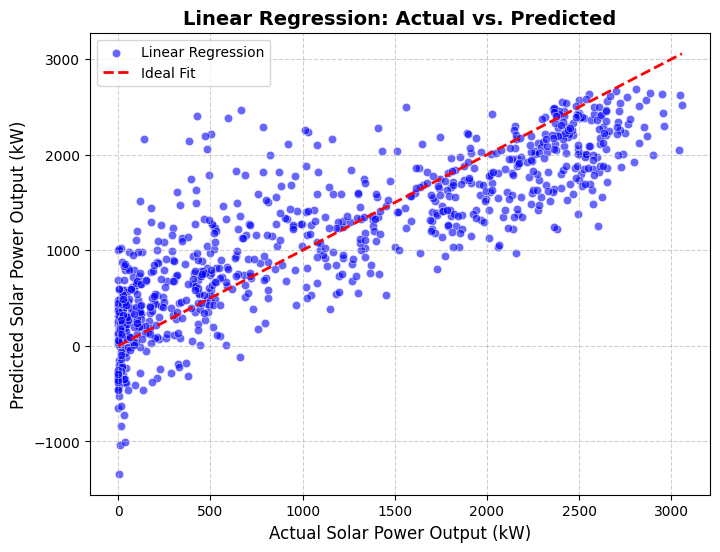

In [180]:
# Visualization: Actual vs. Predicted for Linear Regression
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="blue", label="Linear Regression")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", linewidth=2, label="Ideal Fit")
plt.xlabel("Actual Solar Power Output (kW)", fontsize=12)
plt.ylabel("Predicted Solar Power Output (kW)", fontsize=12)
plt.title("Linear Regression: Actual vs. Predicted", fontsize=14, fontweight="bold")

plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



## Random Forest Regression - Actual vs. Predicted Scatter Plot 

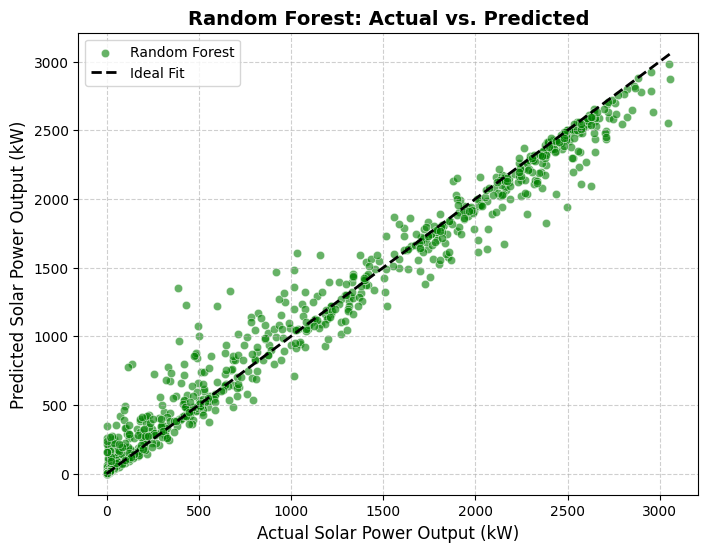

In [181]:

y_pred_test_rf = rf_model.predict(X_test)  

# Visualization: Actual vs. Predicted for Random Forest
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_test_rf, alpha=0.6, color="green", label="Random Forest")

# Reference line for perfect predictions (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="black", linestyle="--", linewidth=2, label="Ideal Fit")
plt.xlabel("Actual Solar Power Output (kW)", fontsize=12)
plt.ylabel("Predicted Solar Power Output (kW)", fontsize=12)
plt.title("Random Forest: Actual vs. Predicted", fontsize=14, fontweight="bold")

plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


## Combined Scatter Plot for Comparing Linear Regression vs. Random Forest

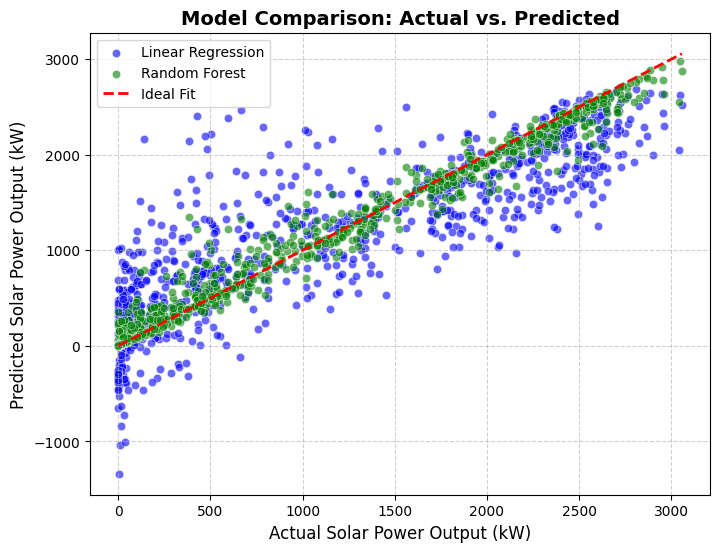

In [182]:
# Create a combined scatter plot
plt.figure(figsize=(8,6))

# Scatter Plot for Linear Regression
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="blue", label="Linear Regression")

# Scatter Plot for Random Forest
sns.scatterplot(x=y_test, y=y_pred_test_rf, alpha=0.6, color="green", label="Random Forest")

# Reference line for perfect predictions (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", linewidth=2, label="Ideal Fit")

plt.xlabel("Actual Solar Power Output (kW)", fontsize=12)
plt.ylabel("Predicted Solar Power Output (kW)", fontsize=12)
plt.title("Model Comparison: Actual vs. Predicted", fontsize=14, fontweight="bold")

plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
